In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import torch                                                                                                                                                                                                       
import torchvision
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
data_points = int(1e4)
noise_factor = 30

In [3]:
x = Variable(torch.linspace(-1, 1, data_points)) # (data_points)
x = torch.unsqueeze(x, 1) # (data_points, 1)

y = Variable(torch.linspace(0, 100, data_points))
y = torch.unsqueeze(y, 1)

noise = noise_factor * Variable(torch.randn(data_points))
y = y.add(noise)

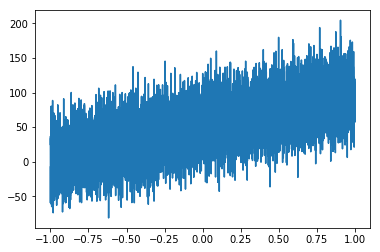

In [4]:
plt.plot(x.data.numpy(), y.data.numpy())

In [5]:
model = nn.Linear(1,1)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [6]:
n_steps = 10000
losses = np.zeros((n_steps))

for i in range(n_steps):
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #losses[i] = loss.data[0]

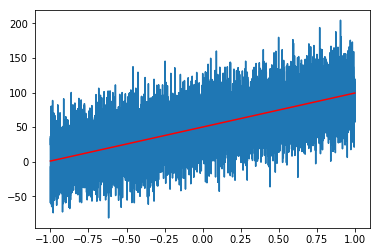

In [7]:
plt.plot(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r')